## In this notebook, Kmeans clustering of images is performed. Prior to that some preprocessing is done.

#### Import relevant libraries 

In [2]:
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
from PIL import Image
import matplotlib.image as mpimg

#### Read sample image

In [3]:
#Read sample image
img=mpimg.imread('data/train/normal/normal (72).png')

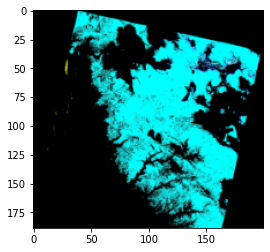

In [4]:
# plot the image
plt.imshow(img)

#### Preprocessing

#### 1. Convert Image to NumPy array 

In [5]:
#Converting Image to numpy array for processing 
img = np.array(img, dtype=np.float64) 
#print shape
img.shape

(189, 200, 4)

In [6]:
#Get the width, heigh and dimension of the image
w, h, d = original_shape = tuple(img.shape)

#### 2. Normalize the RGB values and reshape

In [7]:
#normalize the image
image = np.array(img, dtype=np.float64) / 255

In [8]:
image_array = np.reshape(image, (w * h, d))
print(image_array.shape)

(57883221, 3)


#### K-Means Clustering 

In [9]:
#shuffle the pixels and assign seed for reproducibility
image_array_sample = shuffle(image_array, random_state=0)[:2000]
#Set the number of clusters
k=9
#Instanciate KMeans algorithm
kmeans = KMeans(n_clusters=k, random_state=0)
knnsample = kmeans.fit(image_array_sample)

In [10]:
#Predict labels for the images
labels = kmeans.predict(image_array)
codebook_random = shuffle(image_array, random_state=50)[:k + 1]

In [11]:
def recreate_image(codebook, labels, w, h):
    '''
    This function is used to re-create the images from numpy arrays and assign labels from clustering

    Input : 
    1. numPy array of the image
    2. labels from clustering algorithm
    3. width of the output image
    4. height of the output image

    Returns :
    Recreated Image
    '''
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

In [12]:
labels_random2 = pairwise_distances_argmin(codebook_random,image_array,axis=0)

#### Clustering Algorithm Output

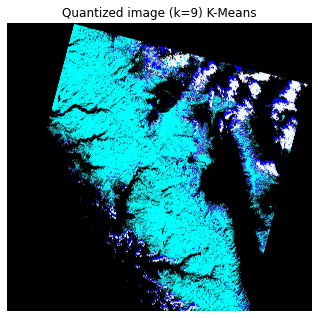

In [13]:
import pylab as pl
pl.figure(2)
pl.clf()
ax = pl.axes([0, 0, 1, 1])
pl.axis('off')
pl.title('Quantized image (k=9) K-Means')
pl.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

##### Note: In the above notebook the algorithm is performed for only 1 image for sake of convenience and complexity requirements of the udacity project. However, the clustering algorithm is performed for all train images.